In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
data = pd.read_csv(f'{Project}/Results/Experiments/tRNA charging assay/Received_20231128/tRNA-charging-assay_result.tsv', sep='\t')
data_dict = data.set_index('Cond', drop=True).T.to_dict('list')

data = pd.melt(data, id_vars='Cond').rename(columns={'variable':'Exp'})
data['Cond'] = pd.Categorical(data['Cond'], categories=['Gly D8','Gln D8','Glu D8'])
data = data.sort_values('Cond')

display(data_dict, data)

{'Gly D8': [1.41, 1.5, 1.88],
 'Gln D8': [1.3, 1.63, 1.59],
 'Glu D8': [0.52, 0.58, 0.82]}

,Cond,Exp,value
0,Gly D8,Exp1,1.41
3,Gly D8,Exp2,1.50
6,Gly D8,Exp3,1.88
1,Gln D8,Exp1,1.30
4,Gln D8,Exp2,1.63
7,Gln D8,Exp3,1.59
2,Glu D8,Exp1,0.52
5,Glu D8,Exp2,0.58
8,Glu D8,Exp3,0.82


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_54747/86861018.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Cond", y="value",
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_54747/86861018.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x="Cond", y="value",


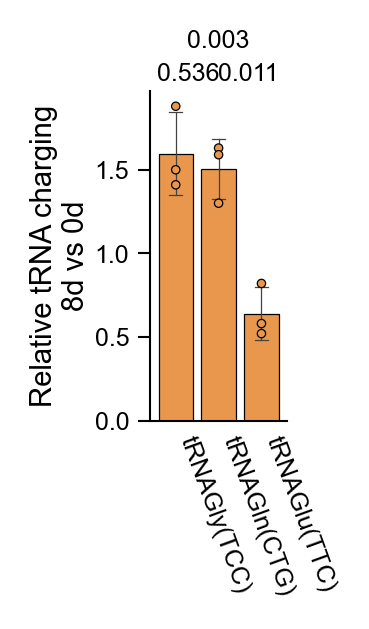

<Figure size 640x480 with 0 Axes>

In [5]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [1/7*3 +1/70*2]
height_ratios = [1.1]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
ax = fig.add_subplot(grid[row,col])

sns.barplot(data=data, x="Cond", y="value",
            palette=['#E8974D','#E8974D','#E8974D'], saturation=1,
            width=0.8,
            errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
            ax=ax, linewidth = 0.3, edgecolor='k',
            legend=False)

sns.stripplot(data=data, x="Cond", y="value",
              palette=['#E8974D','#E8974D','#E8974D'],
              size=2, linewidth=0.3, edgecolor='k',
              jitter=False,
              legend=False)

ax.set_xlim(-0.6, 2.6)
ax.set_xticks([*range(3)])
ax.set_xticklabels(['tRNAGly(TCC)','tRNAGln(CTG)','tRNAGlu(TTC)'], rotation=-70, ha='left')
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='x', length=0, pad=3)

ax.set_xlabel('')
ax.set_ylabel('Relative tRNA charging\n8d vs 0d', labelpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# paired T-test
from scipy import stats

stat, pv = stats.ttest_rel(data_dict['Gly D8'], data_dict['Gln D8'])
ax.text(0.3, 2,f'{pv:.3f}', horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=0)

stat, pv = stats.ttest_rel(data_dict['Gln D8'], data_dict['Glu D8'])
ax.text(1.7, 2,f'{pv:.3f}', horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=0)

stat, pv = stats.ttest_rel(data_dict['Gly D8'], data_dict['Glu D8'])
ax.text(1, 2.2,f'{pv:.3f}', horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=0)

## Show and save the plot
plt.savefig('tRNA-charging-assay_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()